In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
file_name = r'C:\Users\ritthaku\Downloads\'Qualcomm_Stocks.txt'

In [3]:
Stock_qualcomm = pd.read_csv(r'C:\Users\ritthaku\Downloads\Qualcomm_Stocks.txt')

In [4]:
Stock_qualcomm.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-01-02,25.485001,26.025000,24.885000,26.025000,17.366922,18612800
1,2002-01-03,26.030001,26.670000,25.825001,25.990000,17.343565,22240000
2,2002-01-04,26.235001,26.290001,24.895000,25.205000,16.819725,38927400
3,2002-01-07,25.200001,25.209999,23.549999,23.600000,15.748687,40064600
4,2002-01-08,23.424999,24.290001,23.230000,24.094999,16.079002,56385400


In [5]:
Stock_qualcomm.shape

(5234, 7)

In [6]:
Stock_qualcomm.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5.234000e+03
mean,60.192165,60.951975,59.433002,60.200651,50.010987,1.546658e+07
std,33.457699,33.924632,32.958895,33.434639,35.349908,9.819482e+06
min,12.075000,12.765000,11.605000,11.875000,7.924388,2.120200e+06
25%,39.820000,40.304999,39.179998,39.825000,27.864374,9.146925e+06
50%,53.445000,53.960001,52.865000,53.419998,42.253382,1.301650e+07
75%,68.199997,68.830002,67.487499,68.269997,56.399760,1.882850e+07
max,190.300003,193.580002,185.190002,189.279999,186.460327,1.560193e+08


In [7]:
Stock_qualcomm.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
Stock_qualcomm['Date']= pd.to_datetime(Stock_qualcomm['Date'])

In [9]:
print(Stock_qualcomm.Date.dtype)

datetime64[ns]


In [10]:
Stock_qualcomm=Stock_qualcomm.set_index("Date")

In [11]:
Stock_qualcomm.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-01-02,25.485001,26.025000,24.885000,26.025000,17.366922,18612800
2002-01-03,26.030001,26.670000,25.825001,25.990000,17.343565,22240000
2002-01-04,26.235001,26.290001,24.895000,25.205000,16.819725,38927400
2002-01-07,25.200001,25.209999,23.549999,23.600000,15.748687,40064600
2002-01-08,23.424999,24.290001,23.230000,24.094999,16.079002,56385400


In [12]:
print(Stock_qualcomm.shape)

(5234, 6)


In [13]:
yahoo_data = Stock_qualcomm.asfreq('b')

In [14]:
print(Stock_qualcomm.shape)

(5234, 6)


In [15]:
Stock_qualcomm.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-10,120.589996,121.040001,113.449997,114.599998,114.599998,9512600
2022-10-11,112.000000,112.489998,108.650002,110.029999,110.029999,10758800
2022-10-12,110.320000,110.800003,108.379997,108.639999,108.639999,6987900
2022-10-13,105.379997,115.199997,104.660004,112.860001,112.860001,10455000
2022-10-14,114.629997,114.989998,109.790001,109.949997,109.949997,7989800


In [16]:
Stock_qualcomm.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [17]:
Stock_qualcomm.isnull().any(axis=1)

Date
2002-01-02    False
2002-01-03    False
2002-01-04    False
2002-01-07    False
2002-01-08    False
              ...  
2022-10-10    False
2022-10-11    False
2022-10-12    False
2022-10-13    False
2022-10-14    False
Length: 5234, dtype: bool

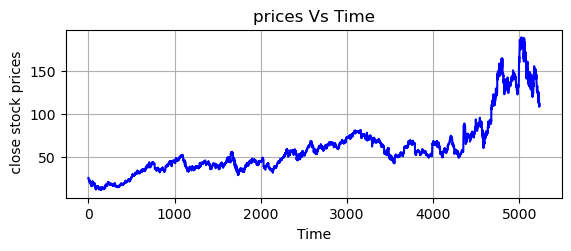

In [18]:
def plotter():
    global closing_stock
    plt.subplot(211)
    company_close = Stock_qualcomm
    company_close = company_close.Close.values.astype('float32')
    company_close = company_close.reshape(-1, 1)
    closing_stock = company_close
    plt.xlabel('Time')
    plt.ylabel(" close stock prices")
    plt.title('prices Vs Time')
    plt.grid(True)
    plt.plot(company_close , 'b')
    plt.show()

plotter()

In [19]:
n_train = int(len(closing_stock) * 0.80)
n_remaining = len(closing_stock) - n_train

n_val = int(n_remaining*0.50)
n_test = n_remaining - n_val 
print("Train samples:",n_train, "Validation Samples:",n_val,"Test Samples:", n_test)

Train samples: 4187 Validation Samples: 523 Test Samples: 524


In [20]:
train_data = closing_stock[0:n_train]
print(train_data.shape)

(4187, 1)


In [21]:
val_data = closing_stock[n_train:n_train+n_val]
print(val_data.shape)

(523, 1)


In [22]:
test_data = closing_stock[n_train+n_val:]
print(test_data.shape)

(524, 1)


In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

train = scaler.fit_transform(train_data)
val = scaler.transform(val_data)
test = scaler.transform(test_data)

In [24]:
def create_dataset(data , n_features):
    dataX, dataY = [], []
    for i in range(len(data)-n_features-1):
        a = data[i:(i+n_features), 0]
        dataX.append(a)
        dataY.append(data[i + n_features, 0])
    return np.array(dataX), np.array(dataY)
n_features = 2

In [25]:
trainX, trainY = create_dataset(train, n_features)
valX, valY = create_dataset(val, n_features)
testX, testY = create_dataset(test, n_features)

In [26]:
print(trainX.shape , trainY.shape , valX.shape , valY.shape, testX.shape , testY.shape)

(4184, 2) (4184,) (520, 2) (520,) (521, 2) (521,)


In [27]:
trainX = trainX.reshape(trainX.shape[0] , 1 ,trainX.shape[1])
valX = valX.reshape(valX.shape[0] , 1 ,valX.shape[1])
testX = testX.reshape(testX.shape[0] , 1 ,testX.shape[1])

In [28]:
print(trainX.shape , trainY.shape , valX.shape , valY.shape, testX.shape , testY.shape)

(4184, 1, 2) (4184,) (520, 1, 2) (520,) (521, 1, 2) (521,)


In [29]:
import tensorflow as tf
tf.random.set_seed(42)
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

In [30]:
model=keras.Sequential()

In [31]:
# First GRU layer
model.add(layers.GRU(units=100, return_sequences=True, input_shape=(1,n_features), activation='tanh'))
model.add(layers.Dropout(0.2))

# Second GRU layer
model.add(layers.GRU(units=150, return_sequences=True, input_shape=(1,n_features), activation='tanh'))
model.add(layers.Dropout(0.2))

# Third GRU layer
model.add(layers.GRU(units=100, activation='tanh'))
model.add(layers.Dropout(0.2))

# The output layer
model.add(layers.Dense(units=1, kernel_initializer='he_uniform', activation='linear'))

In [32]:
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate = 0.0005) , metrics = ['mean_squared_error'])

print(model.summary())

history = model.fit(trainX,trainY,epochs=100,batch_size=128, verbose=1, validation_data = (valX,valY))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1, 100)            31200     
                                                                 
 dropout (Dropout)           (None, 1, 100)            0         
                                                                 
 gru_1 (GRU)                 (None, 1, 150)            113400    
                                                                 
 dropout_1 (Dropout)         (None, 1, 150)            0         
                                                                 
 gru_2 (GRU)                 (None, 100)               75600     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 1

33/33 [==============================] - 0s 9ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 44/100
33/33 [==============================] - 0s 8ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 45/100
33/33 [==============================] - 0s 8ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 46/100
33/33 [==============================] - 0s 9ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 47/100
33/33 [==============================] - 0s 9ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 48/100
33/33 [==============================] - 0s 9ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 49/100
33/33 [=====================

33/33 [==============================] - 0s 8ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 94/100
33/33 [==============================] - 0s 8ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 95/100
33/33 [==============================] - 0s 8ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 96/100
33/33 [==============================] - 0s 8ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 97/100
33/33 [==============================] - 0s 9ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 98/100
33/33 [==============================] - 0s 9ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 99/100
33/33 [=====================

In [33]:
import math

def model_score(model, X_train, y_train, X_val, y_val , X_test, y_test):
    print('Train Score:')
    train_score = model.evaluate(X_train, y_train, verbose=0)
    print("MSE: {:.5f} , RMSE: {:.2f}".format(train_score[0], math.sqrt(train_score[0])))

    print('Validation Score:')
    val_score = model.evaluate(X_val, y_val, verbose=0)
    print("MSE: {:.5f} , RMSE: {:.2f}".format (val_score[0], math.sqrt(val_score[0])))

    print('Test Score:')
    test_score = model.evaluate(X_test, y_test, verbose=0)
    print("MSE: {:.5f} , RMSE: {:.2f}".format (test_score[0], math.sqrt(test_score[0])))


model_score(model, trainX, trainY ,valX, valY , testX, testY)

Train Score:
MSE: 0.00026 , RMSE: 0.02
Validation Score:
MSE: 0.00146 , RMSE: 0.04
Test Score:
MSE: 0.02797 , RMSE: 0.17


In [34]:
print(history.history.keys())

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


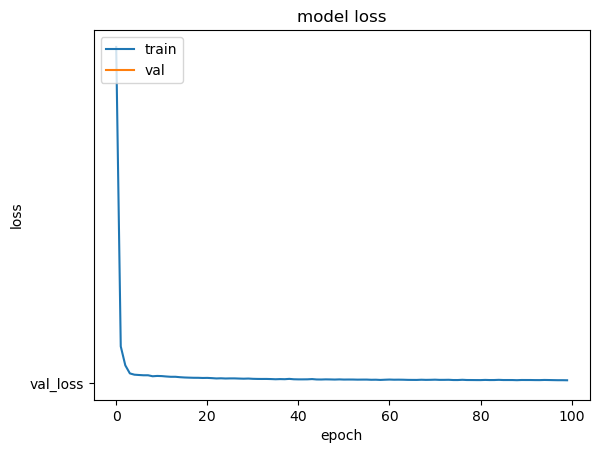

In [35]:
plt.plot(history.history['loss'])  # plotting train loss
plt.plot('val_loss')  # plotting validation loss

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

17/17 [==============================] - 1s 1ms/step
[[108.03859 ]
 [108.08003 ]
 [109.62356 ]
 [107.751335]
 [108.243126]
 [110.14086 ]
 [113.27554 ]
 [113.29093 ]
 [113.28749 ]
 [114.580505]]
[[111.91999]
 [113.81999]
 [110.57   ]
 [112.19   ]
 [114.5    ]
 [118.47   ]
 [117.37999]
 [117.68   ]
 [119.52   ]
 [115.47   ]]


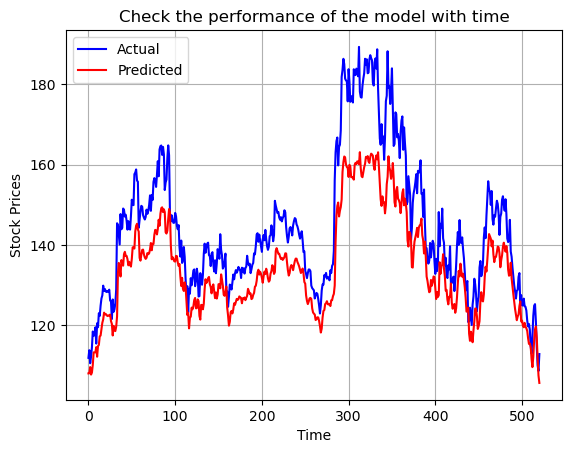

In [36]:
pred = model.predict(testX)
pred = scaler.inverse_transform(pred)
print(pred[:10])

testY_actual = testY.reshape(testY.shape[0] , 1)
testY_actual = scaler.inverse_transform(testY_actual)
print(testY_actual[:10])

plt.plot(testY_actual , 'b')
plt.plot(pred , 'r')

plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the performance of the model with time')
plt.legend(['Actual', 'Predicted'], loc='upper left')

plt.grid(True)
plt.show()